# Building a neural network to predict income from description of a film

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### SPARQL query to fetch title, description, income of films from dbpedia


``` sparql
SELECT distinct ?title ?desc ?income ?f
WHERE
{
  ?f rdf:type dbo:Film .
  ?f dbp:title ?title .
  ?f dbo:abstract ?desc .
  ?f dbo:gross ?income .

  FILTER ( LANG ( ?desc) = 'en' )
}
LIMIT 3
```


## Pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
# df = pd.read_csv("/content/sparql_2022-05-03_07-43-51Z.csv")
df = pd.read_csv("./sparql_2022-05-03_07-43-51Z.csv") # MH: For my local notebook
df.shape

(10000, 3)

In [3]:
df.head()

desc      income  \
0  2040 is a 2019 Australian documentary directed...    942937.0   
1  2046 is a 2004 romantic drama film written, pr...  19500000.0   
2  205 – Room of Fear (German: 205 – Zimmer der A...    309172.0   
3  20 Centimeters (Spanish: 20 centímetros) is a ...       434.0   
4  20 Dates is a 1998 American mockumentary film....    536767.0   

                                                f  
0         http://dbpedia.org/resource/2040_(film)  
1         http://dbpedia.org/resource/2046_(film)  
2  http://dbpedia.org/resource/205_–_Room_of_Fear  
3      http://dbpedia.org/resource/20_Centimeters  
4            http://dbpedia.org/resource/20_Dates

In [4]:
df.tail()

desc      income  \
9995  Crouching Tiger, Hidden Dragon: Sword of Desti...  31000000.0   
9996  Crown Heights is a 2017 American biographical ...    238558.0   
9997  Crown Vic is a 2019 American action film direc...      4000.0   
9998  Crows Explode (クローズ EXPLODE, Kurōzu Explode) i...  10315875.0   
9999  Crows Zero (クローズZERO, Kurōzu Zero), also known...  22036607.0   

                                                      f  
9995  http://dbpedia.org/resource/Crouching_Tiger,_H...  
9996   http://dbpedia.org/resource/Crown_Heights_(film)  
9997       http://dbpedia.org/resource/Crown_Vic_(film)  
9998          http://dbpedia.org/resource/Crows_Explode  
9999             http://dbpedia.org/resource/Crows_Zero

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   desc    10000 non-null  object 
 1   income  10000 non-null  float64
 2   f       10000 non-null  object 
dtypes: float64(1), object(2)
memory usage: 234.5+ KB


In [6]:
X = df.iloc[:, 0]
X.head()

0    2040 is a 2019 Australian documentary directed...
1    2046 is a 2004 romantic drama film written, pr...
2    205 – Room of Fear (German: 205 – Zimmer der A...
3    20 Centimeters (Spanish: 20 centímetros) is a ...
4    20 Dates is a 1998 American mockumentary film....
Name: desc, dtype: object

In [7]:
y = df.iloc[:, 1]
y.head()

0      942937.0
1    19500000.0
2      309172.0
3         434.0
4      536767.0
Name: income, dtype: float64

In [8]:
df.describe()

income
count  1.000000e+04
mean   1.823563e+08
std    7.701489e+09
min    0.000000e+00
25%    7.194890e+05
50%    3.700000e+06
75%    2.200000e+07
max    6.640000e+11

In [9]:
df = pd.concat([df.groupby("f").mean(), df.groupby("f").nth(0).desc], axis=1)
df

income  \
f                                                                
http://dbpedia.org/resource/$pent                       9287.0   
http://dbpedia.org/resource/'71_(film)               3200000.0   
http://dbpedia.org/resource/'96_(film)                    50.0   
http://dbpedia.org/resource/'Til_Death_Do_Us_Pa...   3500000.0   
http://dbpedia.org/resource/'Til_There_Was_You       3500000.0   
...                                                        ...   
http://dbpedia.org/resource/Élisa_(film)            18500000.0   
http://dbpedia.org/resource/Épouse-moi_mon_pote     21600000.0   
http://dbpedia.org/resource/Évocateur:_The_Mort...      6939.0   
http://dbpedia.org/resource/Ó_Paí,_Ó                 3172654.0   
http://dbpedia.org/resource/Želary                  43881284.0   

                                                                                                 desc  
f                                                                                                      
http://dbpedia.org/resource/$pent                   $pent is a 2000 drama film directed by Gil Cat...  
http://dbpedia.org/resource/'71_(film)              '71 is a 2014 British historical action thrill...  
http://dbpedia.org/resource/'96_(film)              '96 is a 2018 Indian Tamil-language romantic d...  
http://dbpedia.org/resource/'Til_Death_Do_Us_Pa...  'Til Death Do Us Part is a 2017 American psych...  
http://dbpedia.org/resource/'Til_There_Was_You      'Til There Was You is a 1997 American romantic...  
...                                                                                               ...  
http://dbpedia.org/resource/Élisa_(film)            Élisa is a French drama film directed by Jean ...  
http://dbpedia.org/resource/Épouse-moi_mon_pote     Épouse-moi mon pote (meaning "Marry me, my dud...  
http://dbpedia.org/resource/Évocateur:_The_Mort...  Évocateur: The Morton Downey Jr. Movie is a 20...  
http://dbpedia.org/resource/Ó_Paí,_Ó                Ó Paí, Ó (colloquial form of "Olhe Para Isso, ...  
http://dbpedia.org/resource/Želary                  Želary is a 2003 Czech/Slovak film directed by...  

[9770 rows x 2 columns]

In [10]:
zscore = (df.income - df.income.mean()) / df.income.std()
dfwo = df[abs(zscore)<2.0]


dfwo=df[df.income < 500000000]
dfwo.describe() 

income
count  9.520000e+03
mean   2.659609e+07
std    6.199594e+07
min    0.000000e+00
25%    6.760765e+05
50%    3.450000e+06
75%    1.940488e+07
max    4.974000e+08

In [11]:
dfwo.shape

(9520, 2)

In [12]:
import plotly.express as px

fig = px.violin(dfwo, y="income")
fig.show()

In [13]:
dfwo[dfwo.income < 10000000].income.median()

1268107.0

In [14]:
import matplotlib.pyplot as plt

def plot_range(ar, marker='|'):
  f = plt.figure()
  f.set_figwidth(20)
  f.set_figheight(3)
  val = 0. 
  plt.plot(ar, np.zeros_like(ar) + val, 'x', marker=marker)
  plt.show()

C:\Users\maxim\AppData\Local\Temp/ipykernel_14276/4172125316.py:8: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "x" (-> marker='x'). The keyword argument will take precedence.



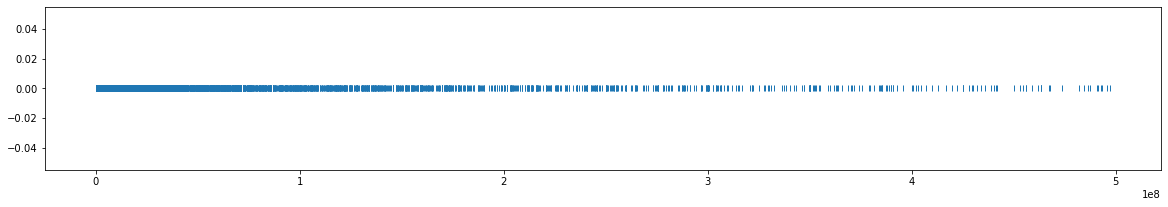

In [15]:
plot_range(np.array(dfwo.income))

## Preprocessing


### Overall data

In [16]:
dfwo.isnull().sum()

income    0
desc      0
dtype: int64

In [17]:
dfwo.loc[(dfwo.income > 0), 'income_c'] = 'medium-low'
dfwo.loc[(dfwo.income > 1266107), 'income_c'] = 'medium-high'
dfwo.loc[(dfwo.income > 10e6), 'income_c'] = 'exceptional'
dfwo.head()

D:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\users\maxim\anaconda3\envs\rnn-films\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



income  \
f                                                               
http://dbpedia.org/resource/$pent                      9287.0   
http://dbpedia.org/resource/'71_(film)              3200000.0   
http://dbpedia.org/resource/'96_(film)                   50.0   
http://dbpedia.org/resource/'Til_Death_Do_Us_Pa...  3500000.0   
http://dbpedia.org/resource/'Til_There_Was_You      3500000.0   

                                                                                                 desc  \
f                                                                                                       
http://dbpedia.org/resource/$pent                   $pent is a 2000 drama film directed by Gil Cat...   
http://dbpedia.org/resource/'71_(film)              '71 is a 2014 British historical action thrill...   
http://dbpedia.org/resource/'96_(film)              '96 is a 2018 Indian Tamil-language romantic d...   
http://dbpedia.org/resource/'Til_Death_Do_Us_Pa...  'Til Death Do Us Part is a 2017 American psych...   
http://dbpedia.org/resource/'Til_There_Was_You      'Til There Was You is a 1997 American romantic...   

                                                       income_c  
f                                                                
http://dbpedia.org/resource/$pent                    medium-low  
http://dbpedia.org/resource/'71_(film)              medium-high  
http://dbpedia.org/resource/'96_(film)               medium-low  
http://dbpedia.org/resource/'Til_Death_Do_Us_Pa...  medium-high  
http://dbpedia.org/resource/'Til_There_Was_You      medium-high

In [18]:
dfwo.columns

Index(['income', 'desc', 'income_c'], dtype='object')

In [19]:
dfwo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9520 entries, http://dbpedia.org/resource/$pent to http://dbpedia.org/resource/Želary
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   income    9520 non-null   float64
 1   desc      9520 non-null   object 
 2   income_c  9514 non-null   object 
dtypes: float64(1), object(2)
memory usage: 297.5+ KB


In [20]:
dfwo.head()

income  \
f                                                               
http://dbpedia.org/resource/$pent                      9287.0   
http://dbpedia.org/resource/'71_(film)              3200000.0   
http://dbpedia.org/resource/'96_(film)                   50.0   
http://dbpedia.org/resource/'Til_Death_Do_Us_Pa...  3500000.0   
http://dbpedia.org/resource/'Til_There_Was_You      3500000.0   

                                                                                                 desc  \
f                                                                                                       
http://dbpedia.org/resource/$pent                   $pent is a 2000 drama film directed by Gil Cat...   
http://dbpedia.org/resource/'71_(film)              '71 is a 2014 British historical action thrill...   
http://dbpedia.org/resource/'96_(film)              '96 is a 2018 Indian Tamil-language romantic d...   
http://dbpedia.org/resource/'Til_Death_Do_Us_Pa...  'Til Death Do Us Part is a 2017 American psych...   
http://dbpedia.org/resource/'Til_There_Was_You      'Til There Was You is a 1997 American romantic...   

                                                       income_c  
f                                                                
http://dbpedia.org/resource/$pent                    medium-low  
http://dbpedia.org/resource/'71_(film)              medium-high  
http://dbpedia.org/resource/'96_(film)               medium-low  
http://dbpedia.org/resource/'Til_Death_Do_Us_Pa...  medium-high  
http://dbpedia.org/resource/'Til_There_Was_You      medium-high

In [21]:
dfwo.head()

income  \
f                                                               
http://dbpedia.org/resource/$pent                      9287.0   
http://dbpedia.org/resource/'71_(film)              3200000.0   
http://dbpedia.org/resource/'96_(film)                   50.0   
http://dbpedia.org/resource/'Til_Death_Do_Us_Pa...  3500000.0   
http://dbpedia.org/resource/'Til_There_Was_You      3500000.0   

                                                                                                 desc  \
f                                                                                                       
http://dbpedia.org/resource/$pent                   $pent is a 2000 drama film directed by Gil Cat...   
http://dbpedia.org/resource/'71_(film)              '71 is a 2014 British historical action thrill...   
http://dbpedia.org/resource/'96_(film)              '96 is a 2018 Indian Tamil-language romantic d...   
http://dbpedia.org/resource/'Til_Death_Do_Us_Pa...  'Til Death Do Us Part is a 2017 American psych...   
http://dbpedia.org/resource/'Til_There_Was_You      'Til There Was You is a 1997 American romantic...   

                                                       income_c  
f                                                                
http://dbpedia.org/resource/$pent                    medium-low  
http://dbpedia.org/resource/'71_(film)              medium-high  
http://dbpedia.org/resource/'96_(film)               medium-low  
http://dbpedia.org/resource/'Til_Death_Do_Us_Pa...  medium-high  
http://dbpedia.org/resource/'Til_There_Was_You      medium-high

### Text description

In [22]:
import string
import re
import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')

def clean_text(text):
  text = "".join([word.lower() for word in text if word not in string.punctuation])
  
  # Remove links starting with http
  text1 = re.sub(r'http\S+', ' ', text)

  # Remove digits
  text2 = re.sub(r'\d+', ' ', text1)
  tokens = re.split('\W+', text2)
  text = [word for word in tokens if word not in stopwords+[""]] # MdA: Added the empty string to stopwords

  return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maxim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
dfwo['desc_p'] = dfwo['desc'].apply(lambda x: clean_text(x))
# MdA: created a new column, as otherwise when applied twice it 
# messes things up
dfwo.head()
dfwo

C:\Users\maxim\AppData\Local\Temp/ipykernel_14276/2966337120.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



income  \
f                                                                
http://dbpedia.org/resource/$pent                       9287.0   
http://dbpedia.org/resource/'71_(film)               3200000.0   
http://dbpedia.org/resource/'96_(film)                    50.0   
http://dbpedia.org/resource/'Til_Death_Do_Us_Pa...   3500000.0   
http://dbpedia.org/resource/'Til_There_Was_You       3500000.0   
...                                                        ...   
http://dbpedia.org/resource/Élisa_(film)            18500000.0   
http://dbpedia.org/resource/Épouse-moi_mon_pote     21600000.0   
http://dbpedia.org/resource/Évocateur:_The_Mort...      6939.0   
http://dbpedia.org/resource/Ó_Paí,_Ó                 3172654.0   
http://dbpedia.org/resource/Želary                  43881284.0   

                                                                                                 desc  \
f                                                                                                       
http://dbpedia.org/resource/$pent                   $pent is a 2000 drama film directed by Gil Cat...   
http://dbpedia.org/resource/'71_(film)              '71 is a 2014 British historical action thrill...   
http://dbpedia.org/resource/'96_(film)              '96 is a 2018 Indian Tamil-language romantic d...   
http://dbpedia.org/resource/'Til_Death_Do_Us_Pa...  'Til Death Do Us Part is a 2017 American psych...   
http://dbpedia.org/resource/'Til_There_Was_You      'Til There Was You is a 1997 American romantic...   
...                                                                                               ...   
http://dbpedia.org/resource/Élisa_(film)            Élisa is a French drama film directed by Jean ...   
http://dbpedia.org/resource/Épouse-moi_mon_pote     Épouse-moi mon pote (meaning "Marry me, my dud...   
http://dbpedia.org/resource/Évocateur:_The_Mort...  Évocateur: The Morton Downey Jr. Movie is a 20...   
http://dbpedia.org/resource/Ó_Paí,_Ó                Ó Paí, Ó (colloquial form of "Olhe Para Isso, ...   
http://dbpedia.org/resource/Želary                  Želary is a 2003 Czech/Slovak film directed by...   

                                                       income_c  \
f                                                                 
http://dbpedia.org/resource/$pent                    medium-low   
http://dbpedia.org/resource/'71_(film)              medium-high   
http://dbpedia.org/resource/'96_(film)               medium-low   
http://dbpedia.org/resource/'Til_Death_Do_Us_Pa...  medium-high   
http://dbpedia.org/resource/'Til_There_Was_You      medium-high   
...                                                         ...   
http://dbpedia.org/resource/Élisa_(film)            exceptional   
http://dbpedia.org/resource/Épouse-moi_mon_pote     exceptional   
http://dbpedia.org/resource/Évocateur:_The_Mort...   medium-low   
http://dbpedia.org/resource/Ó_Paí,_Ó                medium-high   
http://dbpedia.org/resource/Želary                  exceptional   

                                                                                               desc_p  
f                                                                                                      
http://dbpedia.org/resource/$pent                   [pent, drama, film, directed, gil, cates, jr, ...  
http://dbpedia.org/resource/'71_(film)              [british, historical, action, thriller, film, ...  
http://dbpedia.org/resource/'96_(film)              [indian, tamillanguage, romantic, drama, film,...  
http://dbpedia.org/resource/'Til_Death_Do_Us_Pa...  [til, death, us, part, american, psychological...  
http://dbpedia.org/resource/'Til_There_Was_You      [til, american, romantic, comedy, film, direct...  
...                                                                                               ...  
http://dbpedia.org/resource/Élisa_(film)            [élisa, french, drama, film, directed, jean, b...  
http://dbpedia.org/reso

In [24]:
X = dfwo['desc_p'] # MdA: use the new column
y = dfwo['income_c']

### One-hot encoding on target column

In [25]:
y = pd.get_dummies(y)
y.head()

exceptional  medium-high  \
f                                                                              
http://dbpedia.org/resource/$pent                             0            0   
http://dbpedia.org/resource/'71_(film)                        0            1   
http://dbpedia.org/resource/'96_(film)                        0            0   
http://dbpedia.org/resource/'Til_Death_Do_Us_Pa...            0            1   
http://dbpedia.org/resource/'Til_There_Was_You                0            1   

                                                    medium-low  
f                                                               
http://dbpedia.org/resource/$pent                            1  
http://dbpedia.org/resource/'71_(film)                       0  
http://dbpedia.org/resource/'96_(film)                       1  
http://dbpedia.org/resource/'Til_Death_Do_Us_Pa...           0  
http://dbpedia.org/resource/'Til_There_Was_You               0

### Splitting train & test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [27]:
print(X_train.shape)
print(X_test.shape)

(7616,)
(1904,)


In [28]:
print(y_train.shape)
print(y_test.shape)

(7616, 3)
(1904, 3)


### Tokenizing text

In [29]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# The maximum number of words to be used (most frequent)
MAX_NB_WORDS = 10000

# Max number of words in each Tweet
MAX_SEQUENCE_LENGTH = 100

# Intialize and fit the tokenizer
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True, split=' ')
tokenizer.fit_on_texts(X_train)

In [30]:
# Use that tokenizer to transform the text messages in the training and test sets
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

print(X_train[10])
print(X_train_seq[10])

['scene', 'crime', 'french', 'le', 'lieu', 'du', 'crime', 'french', 'crime', 'drama', 'film', 'directed', 'andré', 'téchiné', 'starring', 'catherine', 'deneuve', 'danielle', 'darrieux', 'wadeck', 'stanczak', 'victor', 'lanoux', 'film', 'tells', 'story', 'crumbling', 'family', 'rural', 'france', 'disrupted', 'appearance', 'fugitive']
[596, 93, 34, 404, 974, 93, 34, 93, 14, 1, 2, 1903, 7639, 5, 876, 3963, 2729, 748, 1, 145, 17, 126, 1555, 240, 7640, 393, 5201]


In [31]:
from statistics import *

def get_max_len(seq):
  max_len = 0
  for x in seq:
    if len(x) > max_len:
      max_len = len(x)
  return max_len

def get_mean_std_len(seq):
  values = []
  for x in seq:
    values.append(len(x))
  
  std = stdev(values)
  m = mean(values)
  return int(m + std)

get_mean_std_len(X_train_seq)

90

In [32]:
# Pad the sequences so each sequence is the same length

X_train_seq_padded = pad_sequences(X_train_seq, 100)
# X_train_seq_padded = pad_sequences(X_train_seq, 44)
# X_train_seq_padded = pad_sequences(X_train_seq, get_max_len(X_train_seq))
# X_train_seq_padded = pad_sequences(X_train_seq, get_mean_std_len(X_train_seq))

X_test_seq_padded = pad_sequences(X_test_seq, 100)
# X_test_seq_padded = pad_sequences(X_test_seq, 44)
# X_test_seq_padded = pad_sequences(X_test_seq, get_max_len(X_train_seq))
# X_test_seq_padded = pad_sequences(X_test_seq, get_mean_std_len(X_train_seq))

X_train_seq_padded[10]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,  596,   93,   34,  404,
        974,   93,   34,   93,   14,    1,    2, 1903, 7639,    5,  876,
       3963, 2729,  748,    1,  145,   17,  126, 1555,  240, 7640,  393,
       5201])

In [33]:
print('X_train_seq_padded:', X_train_seq_padded.shape)
print('X_test_seq_padded:', X_test_seq_padded.shape)

print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train_seq_padded: (7616, 100)
X_test_seq_padded: (1904, 100)
y_train: (7616, 3)
y_test: (1904, 3)


## Model Building

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam, RMSprop, Adadelta, Adagrad
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=64, input_length=X_train_seq_padded.shape[1]))

# model.add(SpatialDropout1D(0.4))

model.add(LSTM(128, activation='relu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True, name="lstm_1"))
model.add(LSTM(128, activation='relu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True, name="lstm_2"))
model.add(LSTM(128, activation='relu', dropout=0.2, recurrent_dropout=0.2, name="lstm_3"))

model.add(Dense(64, activation='relu')) 

# model.add(Dropout(0.4))

model.add(Dense(3, activation='softmax')) 


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 lstm_1 (LSTM)               (None, 100, 128)          98816     
                                                                 
 lstm_2 (LSTM)               (None, 100, 128)          131584    
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1,010,435
Trainable params: 1,010,435
Non-

optimizers : https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
- https://deepdatascience.wordpress.com/2016/11/18/which-lstm-optimizer-to-use/
-https://deepdatascience.files.wordpress.com/2016/11/contours_evaluation_optimizers.gif?w=616
- https://deepdatascience.files.wordpress.com/2016/11/saddle_point_evaluation_optimizers.gif?w=616

loss fns : https://www.tensorflow.org/api_docs/python/tf/keras/losses

metrics : https://www.tensorflow.org/api_docs/python/tf/keras/metrics

In [35]:
# Compile the model
# model.compile(optimizer=Adam(learning_rate=0.0001, clipnorm=0.001, clipvalue=0.5), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=RMSprop(learning_rate=0.0001, clipnorm=0.001, clipvalue=0.5), loss='categorical_crossentropy', metrics=['accuracy'])

# Adding an early stopping
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', 
                   patience=3, #Stop the model training if the validation accuracy doesnt increase in 3 consecutive Epochs
                   restore_best_weights=True)

In [37]:
BATCH_SIZE = 64
EPOCHS = 3

In [ ]:
# Fit the RNN
history = model.fit(X_train_seq_padded, y_train, batch_size=BATCH_SIZE, callbacks=[es],
                    epochs=EPOCHS, validation_data=(X_test_seq_padded, y_test))

Epoch 1/3
 45/119 [==========>...................] - ETA: 1:35 - loss: 1.0980 - accuracy: 0.3733

In [ ]:
model.save('./rnn-1')

INFO:tensorflow:Assets written to: ./rnn-1\assets


Might be overfitting https://datascience.stackexchange.com/questions/97132/my-lstm-has-a-really-low-accuracy-is-there-anyway-to-improve-it

Ways to reduce overfitting:
- use more data
- Add dropout layer
- reduce the number of neurons at each layer of the model
- use a different metric rather than **accuracy**
- use **batch normalization** instead of **Dropout**

Other theory is : **Exploding gradient** and could be resolved with **gradient clipping**

https://machinelearningmastery.com/exploding-gradients-in-neural-networks/

So, maybe use a smaller batch size ??

"In the Keras deep learning library, you can use gradient clipping by setting the clipnorm or clipvalue arguments on your optimizer before training. Good default values are **clipnorm=1.0** and **clipvalue=0.5**."

## Model Evaluation

In [ ]:
import plotly.express as px

def plot_acc_loss():
  
  h = history.history

  df_acc = pd.DataFrame()
  df_acc["acc"] = h['accuracy']
  df_acc["val_acc"] = h['val_accuracy']

  df_loss = pd.DataFrame()

  df_loss["loss"] = h['loss']
  df_loss["val_loss"] = h['val_loss']

  fig = px.line(df_acc, title='Accuracy of the model', labels = {'index': "Epoch"}, width=800, height=400)
  fig.show()

  fig = px.line(df_loss, title='Loss of the model', labels = {'index': "Epoch"}, width=800, height=400)
  fig.show()

In [ ]:
plot_acc_loss()

In [ ]:
score = model.evaluate(X_test_seq_padded, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.145591378211975
Test accuracy: 0.5582982897758484


In [ ]:
y_test

exceptional  medium-high  \
f                                                                              
http://dbpedia.org/resource/Heatwave_(film)                   0            0   
http://dbpedia.org/resource/Schindler's_List                  1            0   
http://dbpedia.org/resource/Black_Christmas_(20...            1            0   
http://dbpedia.org/resource/Those_Were_the_Days...            0            0   
http://dbpedia.org/resource/Scorpio_(film)                    0            1   
...                                                         ...          ...   
http://dbpedia.org/resource/Eiffel_I'm_in_Love                0            1   
http://dbpedia.org/resource/Young_Sherlock_Holmes             1            0   
http://dbpedia.org/resource/Wanda_Nevada                      0            1   
http://dbpedia.org/resource/Love_and_Honor_(201...            0            0   
http://dbpedia.org/resource/Weeds_(1987_film)                 0            1   

                                                    medium-low  
f                                                               
http://dbpedia.org/resource/Heatwave_(film)                  1  
http://dbpedia.org/resource/Schindler's_List                 0  
http://dbpedia.org/resource/Black_Christmas_(20...           0  
http://dbpedia.org/resource/Those_Were_the_Days...           1  
http://dbpedia.org/resource/Scorpio_(film)                   0  
...                                                        ...  
http://dbpedia.org/resource/Eiffel_I'm_in_Love               0  
http://dbpedia.org/resource/Young_Sherlock_Holmes            0  
http://dbpedia.org/resource/Wanda_Nevada                     0  
http://dbpedia.org/resource/Love_and_Honor_(201...           1  
http://dbpedia.org/resource/Weeds_(1987_film)                0  

[1904 rows x 3 columns]

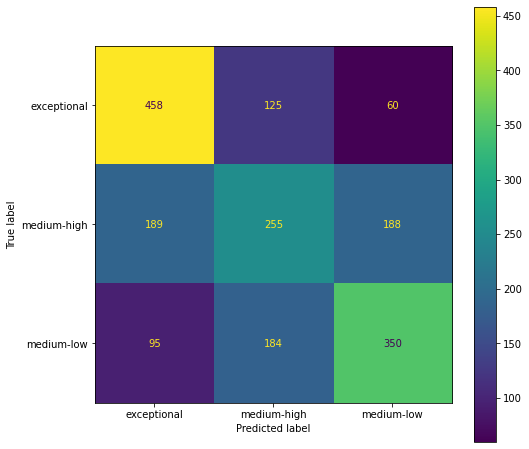

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))

y_pred = model.predict(X_test_seq_padded) # MdA: get the predictions for X_test

# MdA: show the confusion matrix
y_pred_r = np.argmax(y_pred, axis=1)
y_test_r = np.argmax(np.array(y_test), axis=1)
matrix = confusion_matrix(y_test_r,y_pred_r)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=["exceptional","medium-high","medium-low"])
disp.plot(ax=ax)

In [ ]:
model.optimizer.learning_rate, model.optimizer.clipnorm, model.optimizer.clipvalue

(<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>,
 0.001,
 0.5)

### To load the model

In [40]:
from tensorflow import keras
model_loaded = keras.models.load_model("/content/drive/MyDrive/Cours/Stage/models/rnn-1")
model_loaded

**ERASE THE PREVIOUS MODEL**

In [41]:
model = model_loaded

## Output some neuron activations
https://github.com/keras-team/keras/issues/41 

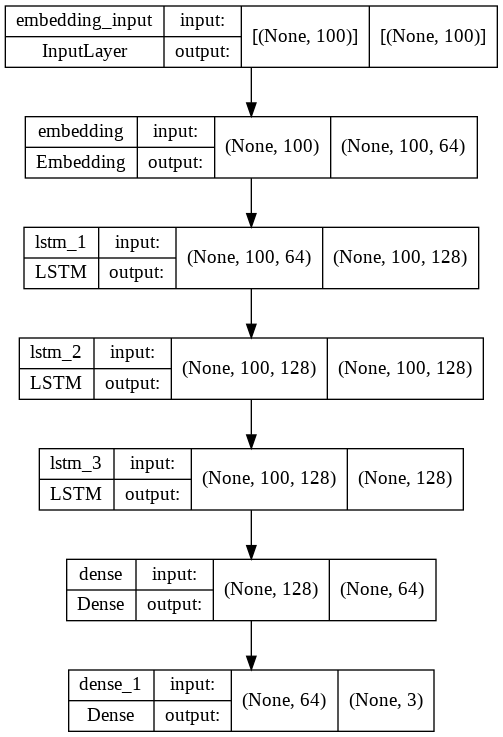

In [50]:
from tensorflow import keras
keras.utils.plot_model(model, show_shapes=True)

In [51]:
list(map(lambda x: x.name, model.layers))

['embedding', 'lstm_1', 'lstm_2', 'lstm_3', 'dense', 'dense_1']

In [52]:
import tensorflow as tf

outs = [] # MH: this is the array where I put all the activations per layer

In [53]:
emb_out = tf.keras.Model(model.input, model.get_layer('embedding').output)
# emb_out(X_test_seq_padded)
outs.append((emb_out(X_test_seq_padded), 'embedding'))

In [54]:
lstm_1_out = tf.keras.Model(emb_out.input, model.get_layer('lstm_1').output)
# lstm_1_out(X_test_seq_padded)
outs.append((lstm_1_out(X_test_seq_padded), 'lstm_1'))

In [55]:
lstm_2_out = tf.keras.Model(lstm_1_out.input, model.get_layer('lstm_2').output)
# lstm_2_out(X_test_seq_padded)
outs.append((lstm_2_out(X_test_seq_padded), 'lstm_2'))

In [56]:
lstm_3_out = tf.keras.Model(lstm_2_out.input, model.get_layer('lstm_3').output)
# lstm_3_out(X_test_seq_padded)
outs.append((lstm_3_out(X_test_seq_padded), 'lstm_3'))

In [57]:
dense_out = tf.keras.Model(lstm_3_out.input, model.get_layer('dense').output)
# dense_out(X_test_seq_padded)
outs.append((dense_out(X_test_seq_padded), 'dense'))

In [58]:
dense_1_out = tf.keras.Model(emb_out.input, model.get_layer('dense_1').output)
# dense_1_out(X_test_seq_padded)
outs.append((dense_1_out(X_test_seq_padded), 'dense_1'))

In [59]:
import sys

for out in outs:
    try:
        fig = px.scatter(out[0][0], title=out[1])
        fig.show()
    except:
        print("Error:", sys.exc_info()[0])

Error: <class 'TypeError'>


/usr/local/lib/python3.7/dist-packages/plotly/express/_core.py:1222: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



Error: <class 'TypeError'>
Error: <class 'TypeError'>


In [60]:
emb_pred = emb_out.predict(X_test_seq_padded)
# lstm_1_out = tf.keras.Model(emb_pred, model.get_layer('lstm_1').output)

### Re-creating second model indentical from the one trained but removing the last dense layer to collect activations values

In [61]:
inputs = keras.Input(shape=(None, None, 3))
processed = keras.layers.RandomCrop(width=32, height=32)(inputs)
conv = keras.layers.Conv2D(filters=2, kernel_size=3)(processed)
pooling = keras.layers.GlobalAveragePooling2D()(conv)
feature = keras.layers.Dense(10)(pooling)

In [62]:
full_model = keras.Model(inputs, feature)
backbone = keras.Model(processed, conv)
activations = keras.Model(conv, feature)

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 lstm_1 (LSTM)               (None, 100, 128)          98816     
                                                                 
 lstm_2 (LSTM)               (None, 100, 128)          131584    
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1,010,435
Trainable params: 1,010,435
Non-

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, SpatialDropout1D
from tensorflow.keras.optimizers import Adam, RMSprop, Adadelta, Adagrad
from keras.callbacks import EarlyStopping

In [65]:
model2 = Sequential()
model2.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=64, input_length=X_train_seq_padded.shape[1], weights=model.layers[0].get_weights()))

activations_embedding = model2.predict(X_test_seq_padded)
activations_embedding.shape

(1904, 100, 64)

In [66]:
activations_embedding[0]

array([[-0.03546925,  0.02800389, -0.00967976, ..., -0.02510614,
         0.01772154,  0.0169718 ],
       [-0.03546925,  0.02800389, -0.00967976, ..., -0.02510614,
         0.01772154,  0.0169718 ],
       [-0.03546925,  0.02800389, -0.00967976, ..., -0.02510614,
         0.01772154,  0.0169718 ],
       ...,
       [-0.04977401, -0.02865787,  0.01007783, ..., -0.03681257,
        -0.03279484,  0.01943571],
       [ 0.04617054,  0.01310025, -0.00291504, ...,  0.0317481 ,
         0.00709851, -0.04498886],
       [ 0.04355634,  0.01201477, -0.02389513, ..., -0.03781454,
         0.02703629,  0.00285916]], dtype=float32)

In [67]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           640000    
                                                                 
Total params: 640,000
Trainable params: 640,000
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Check if arrays are the same
(emb_out(X_test_seq_padded).numpy() == model2.predict(X_test_seq_padded)).all()

True

In [69]:
model2.add(LSTM(128, activation='relu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True, name="lstm_1", weights=model.layers[1].get_weights()))
activations_lstm_1 = model2.predict(X_test_seq_padded)

In [70]:
activations_lstm_1.shape, lstm_1_out(X_test_seq_padded).numpy().shape

((1904, 100, 64), (1904, 100, 128))

In [72]:
for i, layer in enumerate(model.layers):
  print(i, layer.name)

0 embedding
1 lstm_1
2 lstm_2
3 lstm_3
4 dense
5 dense_1


In [73]:
model2 = Sequential()
model2.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=64, input_length=X_train_seq_padded.shape[1], weights=model.layers[0].get_weights()))

# model.add(SpatialDropout1D(0.4))

model2.add(LSTM(128, activation='relu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True, name="lstm_1", weights=model.layers[1].get_weights()))
model2.add(LSTM(128, activation='relu', dropout=0.2, recurrent_dropout=0.2, return_sequences=True, name="lstm_2", weights=model.layers[2].get_weights()))
model2.add(LSTM(128, activation='relu', dropout=0.2, recurrent_dropout=0.2, name="lstm_3", weights=model.layers[3].get_weights()))

model2.add(Dense(64, activation='relu', weights=model.layers[4].get_weights())) 

In [74]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 64)           640000    
                                                                 
 lstm_1 (LSTM)               (None, 100, 128)          98816     
                                                                 
 lstm_2 (LSTM)               (None, 100, 128)          131584    
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
Total params: 1,010,240
Trainable params: 1,010,240
Non-trainable params: 0
_________________________________________________________________


In [75]:
activations = model2.predict(X_test_seq_padded)

### Looking at activations values

Looking over activations values to understand data

In [76]:
activations

array([[0.0000000e+00, 1.6159514e-02, 5.1946575e-03, ..., 4.2099836e-01,
        0.0000000e+00, 0.0000000e+00],
       [1.3367318e+01, 0.0000000e+00, 8.2823792e+00, ..., 1.0483127e+01,
        8.6868995e-01, 0.0000000e+00],
       [8.9390535e+00, 0.0000000e+00, 3.9942532e+00, ..., 6.3680868e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 5.2838478e-02, 8.1468403e-02, ..., 5.4524237e-01,
        0.0000000e+00, 8.8816777e-02],
       [0.0000000e+00, 3.4653291e-02, 8.4596928e-03, ..., 6.0377115e-01,
        0.0000000e+00, 3.1961240e-02],
       [0.0000000e+00, 6.6190004e-02, 4.1409546e-01, ..., 4.3435846e-02,
        0.0000000e+00, 8.0821931e-02]], dtype=float32)

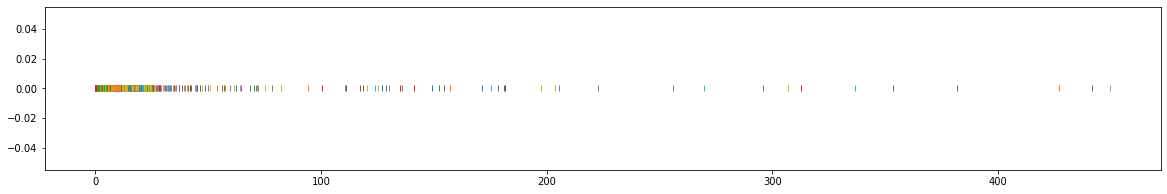

In [77]:
plot_range(np.array(activations))

In [78]:
activations[0]

array([0.        , 0.01615951, 0.00519466, 0.        , 0.        ,
       0.        , 0.        , 0.12628111, 0.7057988 , 0.        ,
       0.01298752, 0.        , 0.54460424, 0.33264178, 0.13564728,
       0.10542792, 0.        , 0.31408653, 0.71581054, 0.        ,
       0.44753614, 0.34474742, 0.2925413 , 0.08598457, 0.        ,
       0.43475604, 0.05467074, 0.        , 0.01197809, 0.0351323 ,
       0.04498538, 0.42093438, 0.32980713, 0.21334895, 0.        ,
       0.1786074 , 0.2017984 , 0.3075815 , 0.        , 0.        ,
       0.        , 0.        , 0.34736758, 0.60713   , 0.        ,
       0.04283793, 0.48495597, 0.        , 0.0508032 , 0.2560185 ,
       0.04707886, 0.        , 0.56451094, 0.1181502 , 0.41306737,
       0.        , 0.1743428 , 0.        , 0.01484576, 0.04609371,
       0.47046512, 0.42099836, 0.        , 0.        ], dtype=float32)

In [79]:
activations.shape

(1904, 64)

In [80]:
pd.DataFrame(activations).describe()

0            1            2            3            4   \
count  1904.000000  1904.000000  1904.000000  1904.000000  1904.000000   
mean      0.496840     0.052066     0.772139     0.031573     0.004902   
std       1.466963     0.040665     7.014622     0.841948     0.162348   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.015932     0.077764     0.000000     0.000000   
50%       0.000000     0.050885     0.337297     0.000000     0.000000   
75%       0.228569     0.084005     0.735827     0.000000     0.000000   
max      13.367318     0.180349   295.622314    28.025595     6.964828   

                5            6            7            8            9   ...  \
count  1904.000000  1904.000000  1904.000000  1904.000000  1904.000000  ...   
mean      1.268989     0.258597     0.171068     0.478900     0.213633  ...   
std       9.449153     0.801261     0.917992     2.901668     3.331360  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.005535     0.000000     0.077010     0.000000     0.000000  ...   
50%       0.393967     0.032364     0.122171     0.304607     0.000000  ...   
75%       1.137049     0.261461     0.169732     0.658405     0.000000  ...   
max     381.602264    24.839611    39.670708   125.002274   110.602753  ...   

                54           55           56           57           58  \
count  1904.000000  1904.000000  1904.000000  1904.000000  1904.000000   
mean      0.183640     0.651866     0.180237     0.016956     0.994195   
std       0.267793    11.115750     0.767516     0.597448     7.429111   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.046718     0.000000     0.078269   
50%       0.000000     0.000000     0.151140     0.000000     0.322268   
75%       0.308051     0.000000     0.219116     0.000000     0.764823   
max       1.307148   441.701660    30.334776    25.048605   306.819855   

                59           60           61           62           63  
count  1904.000000  1904.000000  1904.000000  1904.000000  1904.000000  
mean      0.747164     0.371622     0.430535     0.143911     0.056479  
std       8.736094     2.921111     1.093396     3.868048     0.062679  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.112398     0.021190     0.124465     0.000000     0.000000  
50%       0.307814     0.271713     0.258689     0.000000     0.033317  
75%       0.650037     0.490871     0.475165     0.000000     0.104004  
max     336.572174   126.851311    23.763784   152.277435     0.230170  

[8 rows x 64 columns]

Creating DataFrame containing neurons and activation values for each neuron

In [124]:
df_act = pd.DataFrame()

df_dict = {
    'value': [],
    'neuron_index': []
}

# MH: transpose the matrix to have neurons as index
for neuron_index, value_list in enumerate(activations.T):
  # print(neuron_index, value_list)
  for value in value_list:
    df_dict['value'].append(value)
    df_dict['neuron_index'].append(neuron_index + 1) # MH: Should we let first neuron at 0 ?
  # print(neuron_index)

df_act = df_act.from_dict(df_dict)
df_act.head()


value  neuron_index
0   0.000000             1
1  13.367318             1
2   8.939054             1
3   0.000000             1
4   0.000000             1

In [118]:
df_act.describe()

value   neuron_index
count  121856.000000  121856.000000
mean        0.423973      32.500000
std         4.356957      18.473029
min         0.000000       1.000000
25%         0.000000      16.750000
50%         0.081288      32.500000
75%         0.338520      48.250000
max       449.568939      64.000000

Visualizing activation values over each neuron

In [123]:
px.scatter(df_act, x='neuron_index', y='value', 
           title="Activation values per neuron (first dense layer)",
           labels={'neuron_index': 'Neuron', 'value': 'Value'})

### Clustering
https://en.wikipedia.org/wiki/Kernel_density_estimation

In [125]:
from sklearn.cluster import KMeans

In [128]:
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
px.scatter(X)

In [129]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [130]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [131]:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0], dtype=int32)

In [132]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [133]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_act)

In [134]:
kmeans.labels_

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [135]:
kmeans.cluster_centers_

array([[ 0.50423789, 32.        ],
       [ 0.43674004, 11.        ],
       [ 0.33516962, 53.5       ]])

In [140]:
px.scatter(kmeans.cluster_centers_)